In [1]:
# Plot
import os
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from itertools import product

n_repetitions = 5
results_dir = "./results/results_heart_disease_1223_2"
results = pd.read_csv(os.path.join(results_dir, "results_heart_disease_42.csv"))
for i in range(1, n_repetitions):
    result_ = pd.read_csv(os.path.join(results_dir, f"results_heart_disease_{42+i}.csv"))
    results = results.append(result_, ignore_index=True)

results = results.rename(columns={"mean_perf": "Performance"})
print(results)
results.to_csv(os.path.join(results_dir, "results_heart_disease.csv"), index=False)

                                                 perf  Performance  \
0   [0.6535, 0.6772, 0.7008, 0.7087, 0.7205, 0.736...     0.750667   
1   [0.6063, 0.6654, 0.7205, 0.6654, 0.6929, 0.696...     0.652200   
2   [0.6378, 0.6614, 0.6732, 0.6732, 0.6811, 0.716...     0.727000   
3   [0.6181, 0.6614, 0.6693, 0.7126, 0.7008, 0.665...     0.715200   
4   [0.6181, 0.6929, 0.7402, 0.6969, 0.689, 0.6969...     0.713900   
5   [0.626, 0.6457, 0.6693, 0.7244, 0.685, 0.7126,...     0.748000   
6   [0.5984, 0.6693, 0.6063, 0.5551, 0.5472, 0.460...     0.443600   
7   [0.5748, 0.5669, 0.5669, 0.626, 0.5866, 0.6181...     0.695600   
8   [0.626, 0.6575, 0.6929, 0.7047, 0.7165, 0.7126...     0.728300   
9   [0.6614, 0.7008, 0.6929, 0.6732, 0.6732, 0.685...     0.744100   
10  [0.6535, 0.6772, 0.7047, 0.7126, 0.7244, 0.732...     0.753300   
11  [0.6614, 0.7087, 0.7047, 0.6969, 0.7047, 0.720...     0.734900   
12  [0.6417, 0.6693, 0.7008, 0.7087, 0.7126, 0.724...     0.727000   
13  [0.6181, 0.6181,

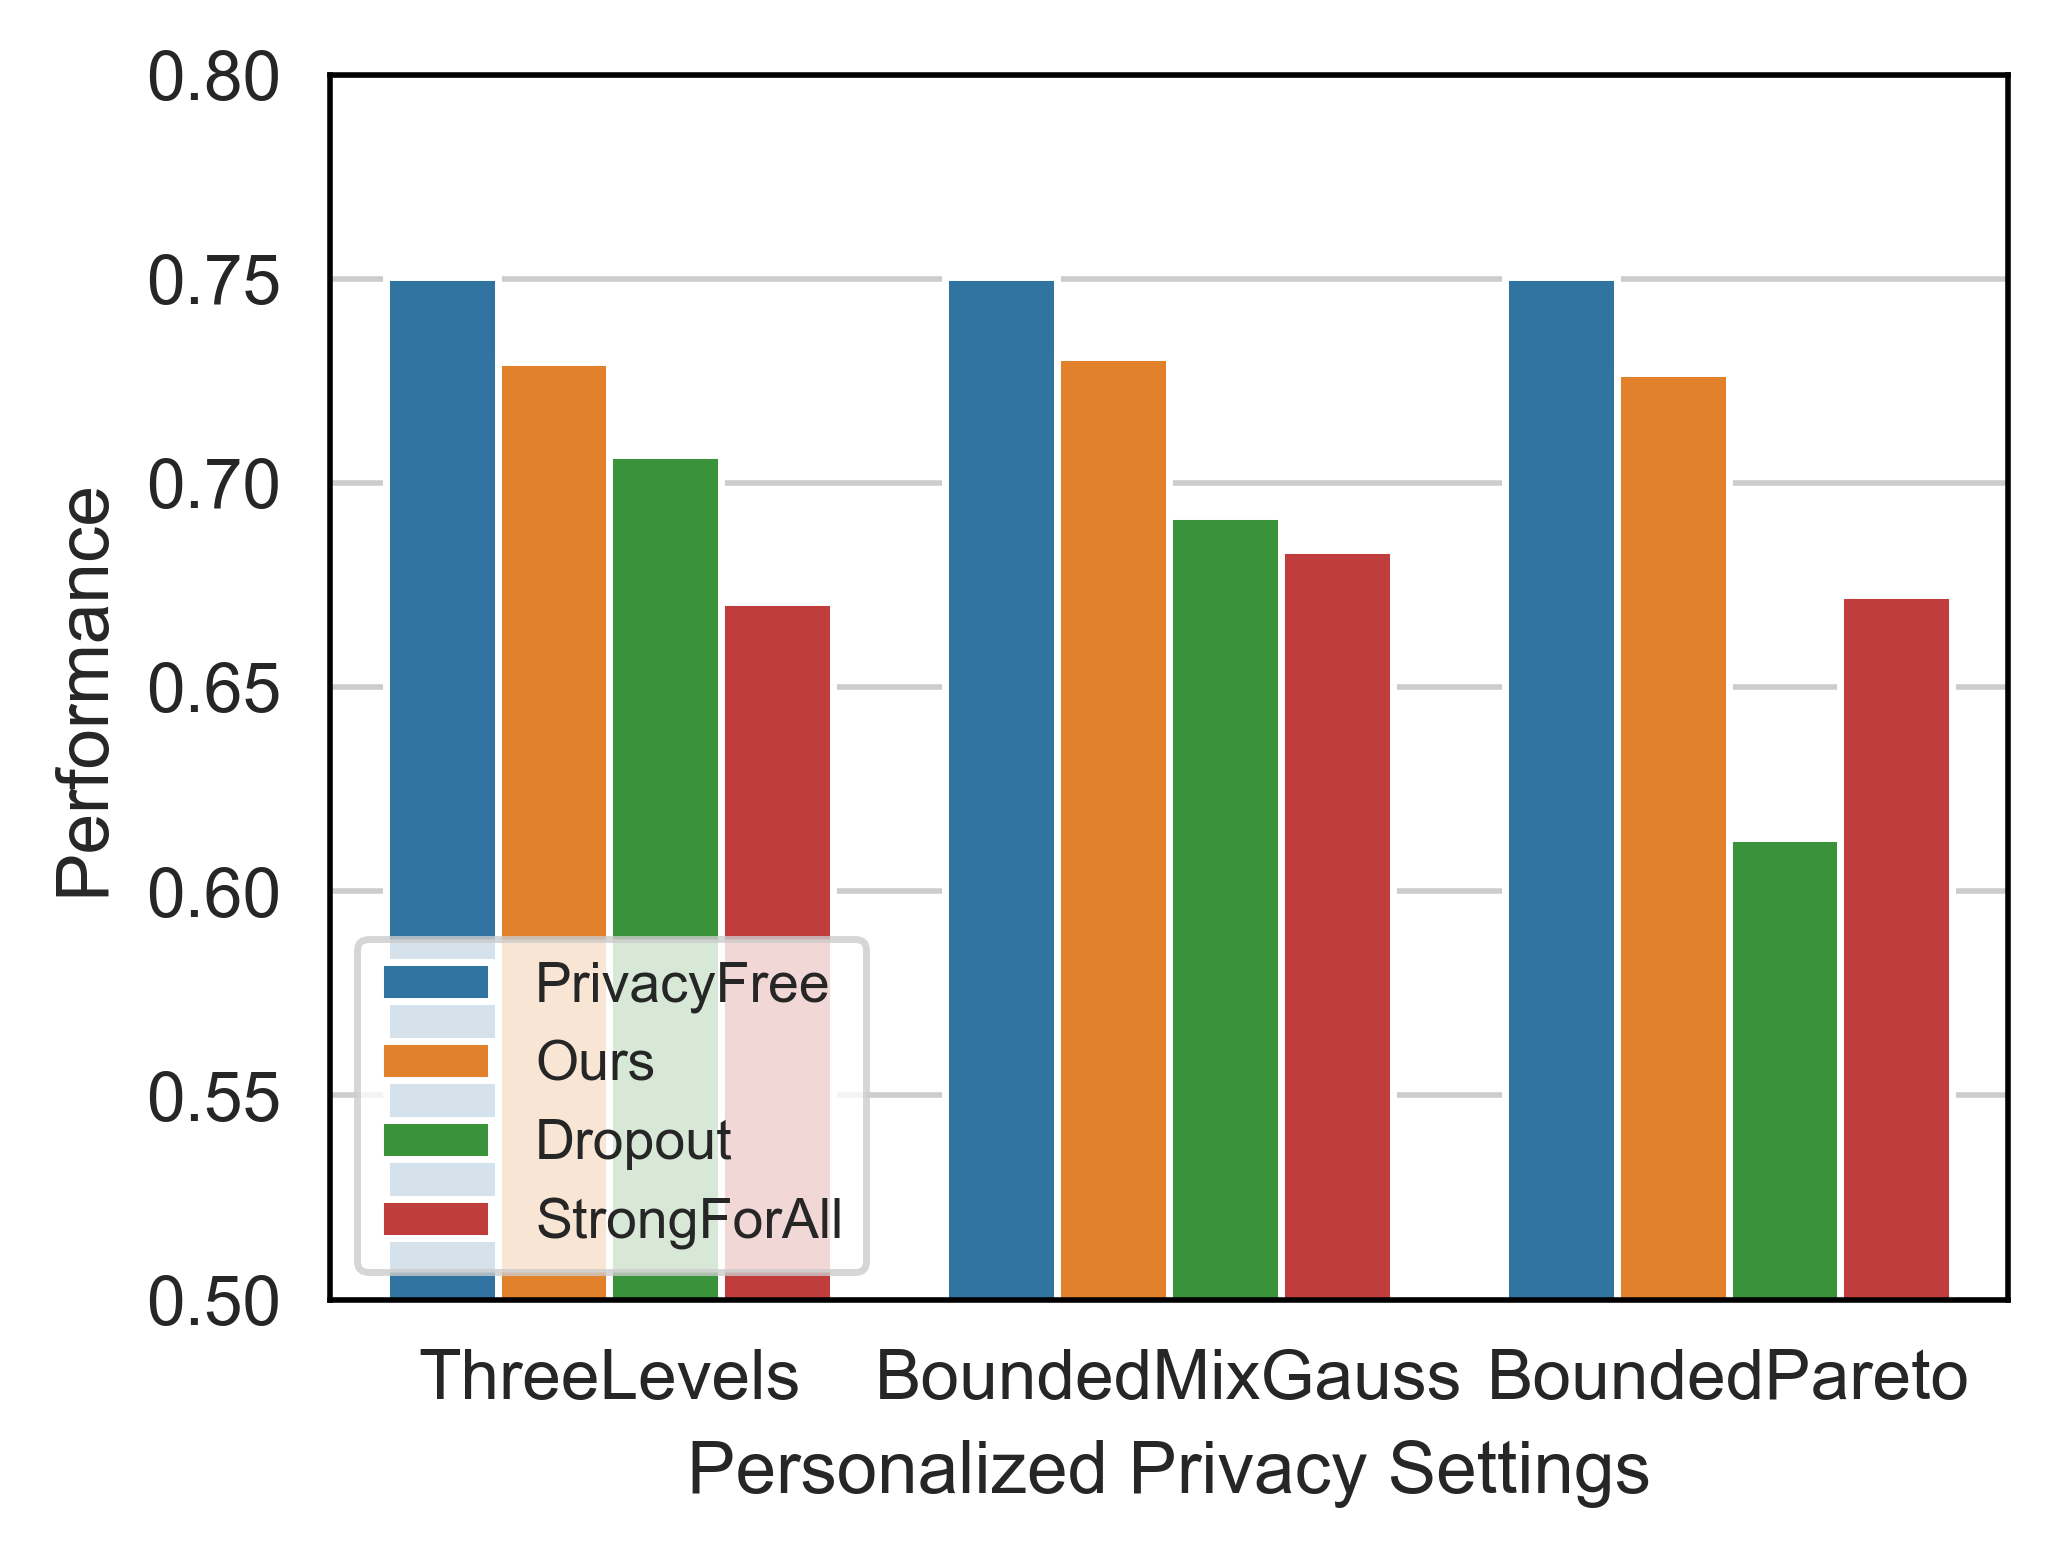

In [2]:
import seaborn as sns
# sns.set_theme(style="darkgrid")
sns.set_style('whitegrid', {'axes.linewidth': 1, 'axes.edgecolor':'black'}) #风格、轮廓线
# sns.set_palette(palette=sns.color_palette('bright')) #颜色

linestyle_str = [
    ("solid", "solid"),  # Same as (0, ()) or '-'
    ("dotted", "dotted"),  # Same as (0, (1, 1)) or ':'
    ("dashed", "dashed"),  # Same as '--'
    ("dashdot", "dashdot"),
]
linestyle_tuple = [
    ("loosely dotted", (0, (1, 10))),
    ("densely dotted", (0, (1, 1))),
    ("loosely dashed", (0, (5, 10))),
    ("densely dashed", (0, (5, 1))),
    ("loosely dashdotted", (0, (3, 10, 1, 10))),
    ("densely dashdotted", (0, (3, 1, 1, 1))),
    ("dashdotdotted", (0, (3, 5, 1, 5, 1, 5))),
    ("loosely dashdotdotted", (0, (3, 10, 1, 10, 1, 10))),
    ("densely dashdotdotted", (0, (3, 1, 1, 1, 1, 1))),
]
linestyles = linestyle_tuple + linestyle_str
legend_font = {'style': 'normal', 'size': 8, 'weight': "normal"}
label_font = {'family':'sans-serif', 'size': 10.5, 'weight': "normal"}
title_font = {'family':'sans-serif', 'size': 10.5, 'weight': "bold"}

results = pd.read_csv(os.path.join(results_dir, "results_heart_disease.csv"))
nmdeltas = [(d, nm) for d, nm in zip(results["d"].unique(), results["nm"].unique()) if not (np.isnan(d))]
nms = [nm for nm in results["nm"].unique() if not (np.isnan(nm))]
enames = ['ThreeLevels', 'BoundedMixGauss', 'BoundedPareto']
methods = ['PrivacyFree', 'Ours', 'Dropout', 'StrongForAll']
deltas = [d for d in results["d"].unique() if not (np.isnan(d))]
edeltas = [(e, d) for e, d in list(product(enames, deltas)) if not (np.isnan(d))]

# vision
plt.close('all')
fig, ax = plt.subplots(1, 1, figsize=(4, 3), constrained_layout=True, dpi=500)
all_results = pd.DataFrame()
for i, (e,d) in enumerate(edeltas):
    for method in methods:
        if method == "PrivacyFree":
            cdf = results.loc[results["e"] == method]
        else:
            cdf = results.loc[results["e"].str.contains(e, na=False)].loc[results["e"].str.contains(method, na=False)].loc[results["d"] == d].loc[results["nm"] == nms[0]]

        cdf_ = cdf.copy() # 需先copy，否则会报警告
        cdf_["method"] = method
        cdf_["epsilon"] = e
        cdf_["mean_values"] = np.array(cdf["Performance"].tolist()).mean()
        
        all_results = all_results.append(cdf_, ignore_index=True)
        del cdf

# 以 epsilon 为x轴，mean_values 为y轴，按照 method 区分类别，绘制条形图
sns.barplot(data=all_results, x="epsilon", y="mean_values", hue="method")

ax.set_ylim(0, 1.0)
plt.legend(prop=legend_font)
plt.xlabel("Personalized Privacy Settings", **label_font)
plt.ylabel("Performance", **label_font)
plt.ylim(0.5, 0.8)
plt.savefig(os.path.join(results_dir, "fed_perf_hist.pdf"), dpi=100, bbox_inches="tight")
plt.show()

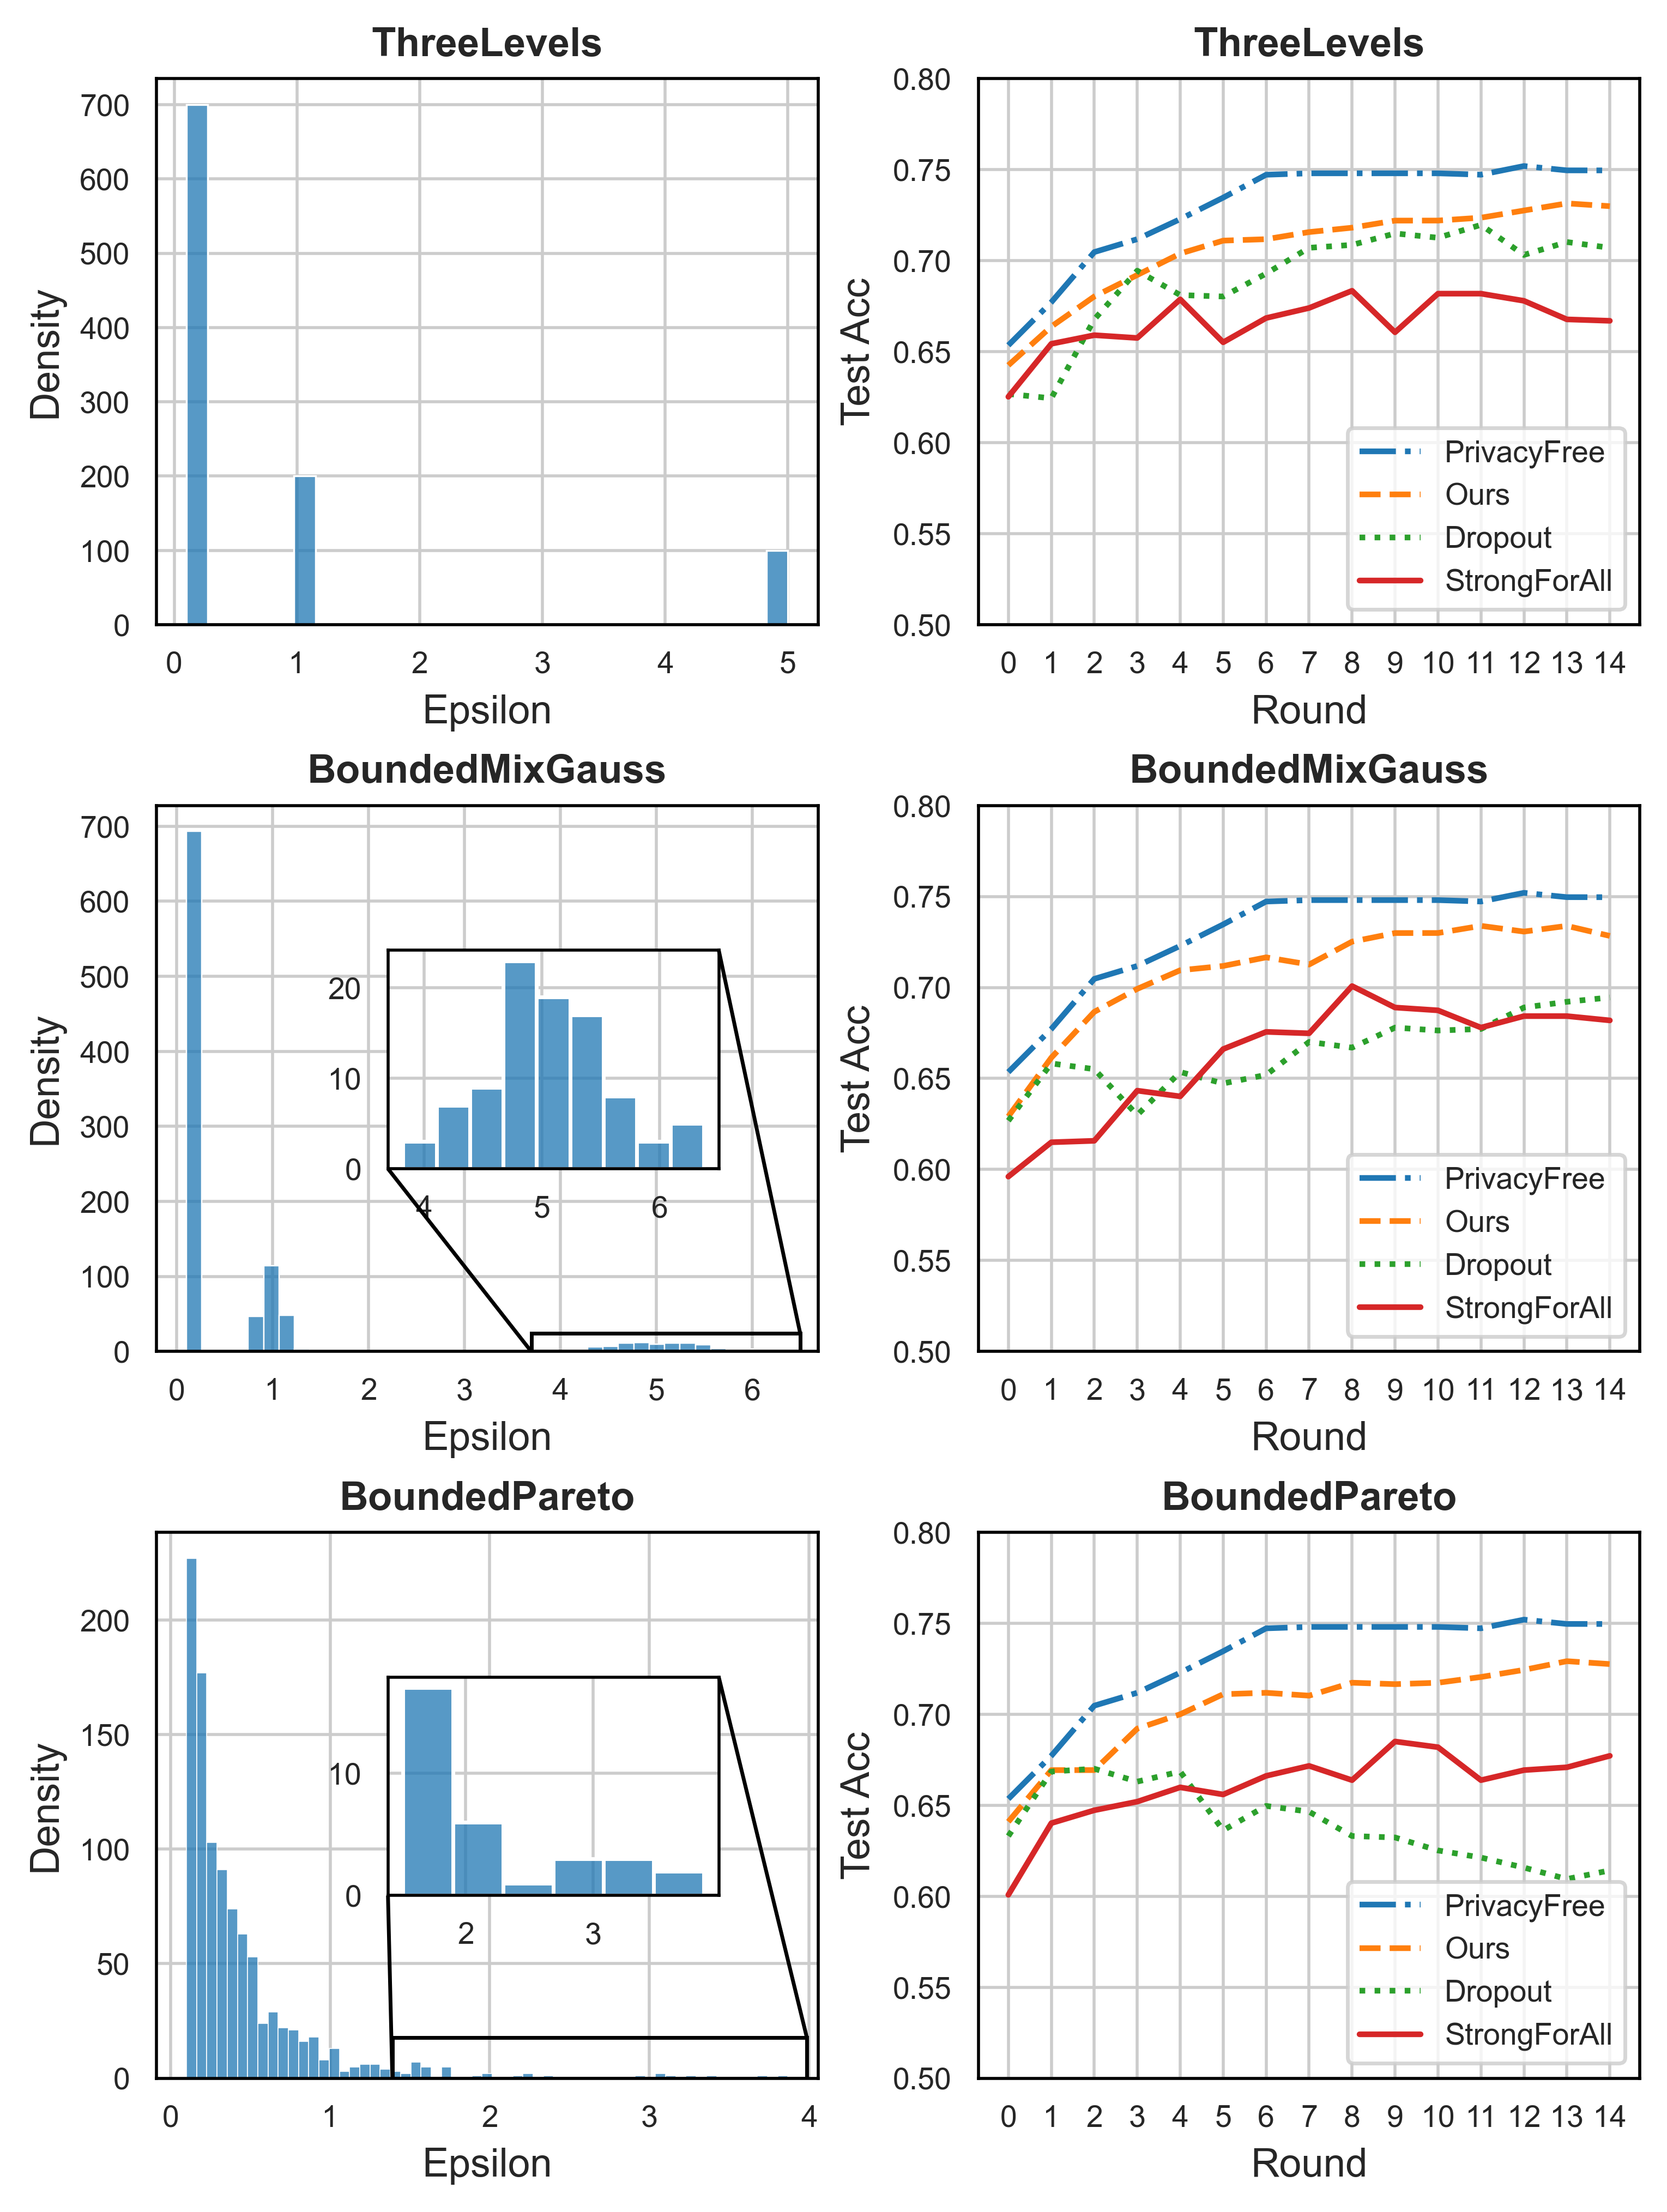

In [3]:
import sys 
sys.path.append("../..")
import json
from sklearn.metrics import r2_score
from fedrpdp.utils.rpdp_utils import MultiLevels, MixGauss, Pareto
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
from mpl_toolkits.axes_grid1.inset_locator import mark_inset

GENERATE_EPSILONS = {
    "ThreeLevels": lambda n, params: MultiLevels(3, *params, n),
    "BoundedMixGauss": lambda n, params: MixGauss(*params, n),
    "BoundedPareto": lambda n, params: Pareto(*params, n), 
}
SETTINGS = {
    "ThreeLevels": [[[0.7,0.2,0.1], [0.1, 1.0, 5.0]]],
    "BoundedPareto": [[4, 0.1]], 
    "BoundedMixGauss": [[[0.7,0.2,0.1], [(0.1, 0.05), (1.0, 0.1), (5.0, 0.5)]]],
}
MIN_EPSILON, MAX_EPSILON = 0.1, 10.0
BoundedFunc = lambda values: np.array([min(max(x, MIN_EPSILON), MAX_EPSILON) for x in values])

total_points = 1000
enames = list(GENERATE_EPSILONS.keys())
deltas = [d for d in results["d"].unique() if not (np.isnan(d))]

# vision
plt.close('all')
fig, axs = plt.subplots(3, 2, figsize=(6, 8), constrained_layout=True, dpi=500)

colors = ['b','g','grey']
for i, ename in enumerate(enames):
    for j, params in enumerate(SETTINGS[ename]):
        target_epsilons = BoundedFunc(GENERATE_EPSILONS[ename](total_points, params))
        sns.histplot(x=target_epsilons, stat="count", ax=axs[i][0], label=f'params{j}')
    
    axs[i][0].set_title(f'{ename}', **title_font)
    axs[i][0].set_ylabel('Density', **label_font)
    axs[i][0].set_xlabel('Epsilon', **label_font)
    axs[i][0].tick_params(labelsize=8)
    
    # ===============
    # 嵌入绘制局部放大图的坐标系
    if ename != 'ThreeLevels':
        axin = inset_axes(axs[i][0], width='50%', height='40%', loc='lower center', 
                           bbox_to_anchor=(0.1,0.3,1,1), 
                           bbox_transform=axs[i][0].transAxes)
        sub_temp = sns.histplot(x=target_epsilons[target_epsilons >= 1.5], ax=axin, stat="count")
        #color=sns.color_palette()[4]
        
        # ax4in.set_ylim(0, 30)
        axin.tick_params(labelsize=8)
        mark_inset(axs[i][0], axin, loc1=1, loc2=3, fc="none", ec='k', lw=1)
        axin.set_ylabel(None, **label_font)
    # ===============

nm = nms[0]
d = deltas[0]
for i, e in enumerate(enames):
    for j, method in enumerate(methods):
        if method == "PrivacyFree":
            cdf = results.loc[results["e"] == method]
        else:
            cdf = results.loc[results["e"].str.contains(e, na=False)].loc[results["e"].str.contains(method, na=False)].loc[results["d"] == d].loc[results["nm"] == nms[0]]
        perf_str = np.array(cdf["perf"].tolist())
        data_arr = np.array([json.loads(_str) for _str in perf_str])
        data_mean = data_arr.mean(axis=0)
        data_std = data_arr.std(axis=0)
        sns.lineplot(data=data_mean, label=method, linestyle=linestyles[::-1][j][1], ax=axs[i][1])
    
    axs[i][1].set_title(f'{e}', **title_font)
    axs[i][1].legend(loc='upper right', prop=legend_font)
    axs[i][1].set_ylabel('Test Acc', **label_font)
    axs[i][1].set_xlabel('Round', **label_font)
    axs[i][1].set_ylim(0.5, 0.8)
    axs[i][1].set_xticks(range(15))
    axs[i][1].tick_params(labelsize=8)
    axs[i][1].legend(loc='lower right', prop=legend_font)

plt.savefig(os.path.join(results_dir, "fed_6plots.pdf"), dpi=500, bbox_inches='tight')
plt.show()

# Noise-Sampling error trade-off

                                                  perf  Performance  \
0    [0.6299, 0.6929, 0.7283, 0.7244, 0.7244, 0.740...       0.7113   
1    [0.622, 0.6732, 0.6654, 0.6929, 0.7047, 0.7047...       0.7231   
2    [0.6299, 0.6063, 0.626, 0.622, 0.6339, 0.6614,...       0.6969   
3    [0.6457, 0.689, 0.6811, 0.6654, 0.6969, 0.6929...       0.7520   
4    [0.6535, 0.689, 0.689, 0.7047, 0.7126, 0.7244,...       0.7441   
..                                                 ...          ...   
220  [0.626, 0.6811, 0.7323, 0.7244, 0.7165, 0.7244...       0.7441   
221  [0.6339, 0.6535, 0.689, 0.6811, 0.6693, 0.6575...       0.6732   
222  [0.4843, 0.5551, 0.685, 0.689, 0.685, 0.7087, ...       0.7231   
223  [0.6339, 0.6614, 0.6969, 0.689, 0.7087, 0.7244...       0.7572   
224  [0.6811, 0.6969, 0.7559, 0.7677, 0.7677, 0.759...       0.7467   

                                  e      d    nm  norm  bs  seed  
0        ThreeLevels-0-StrongForAll  0.001   5.0   1.0   3    42  
1            

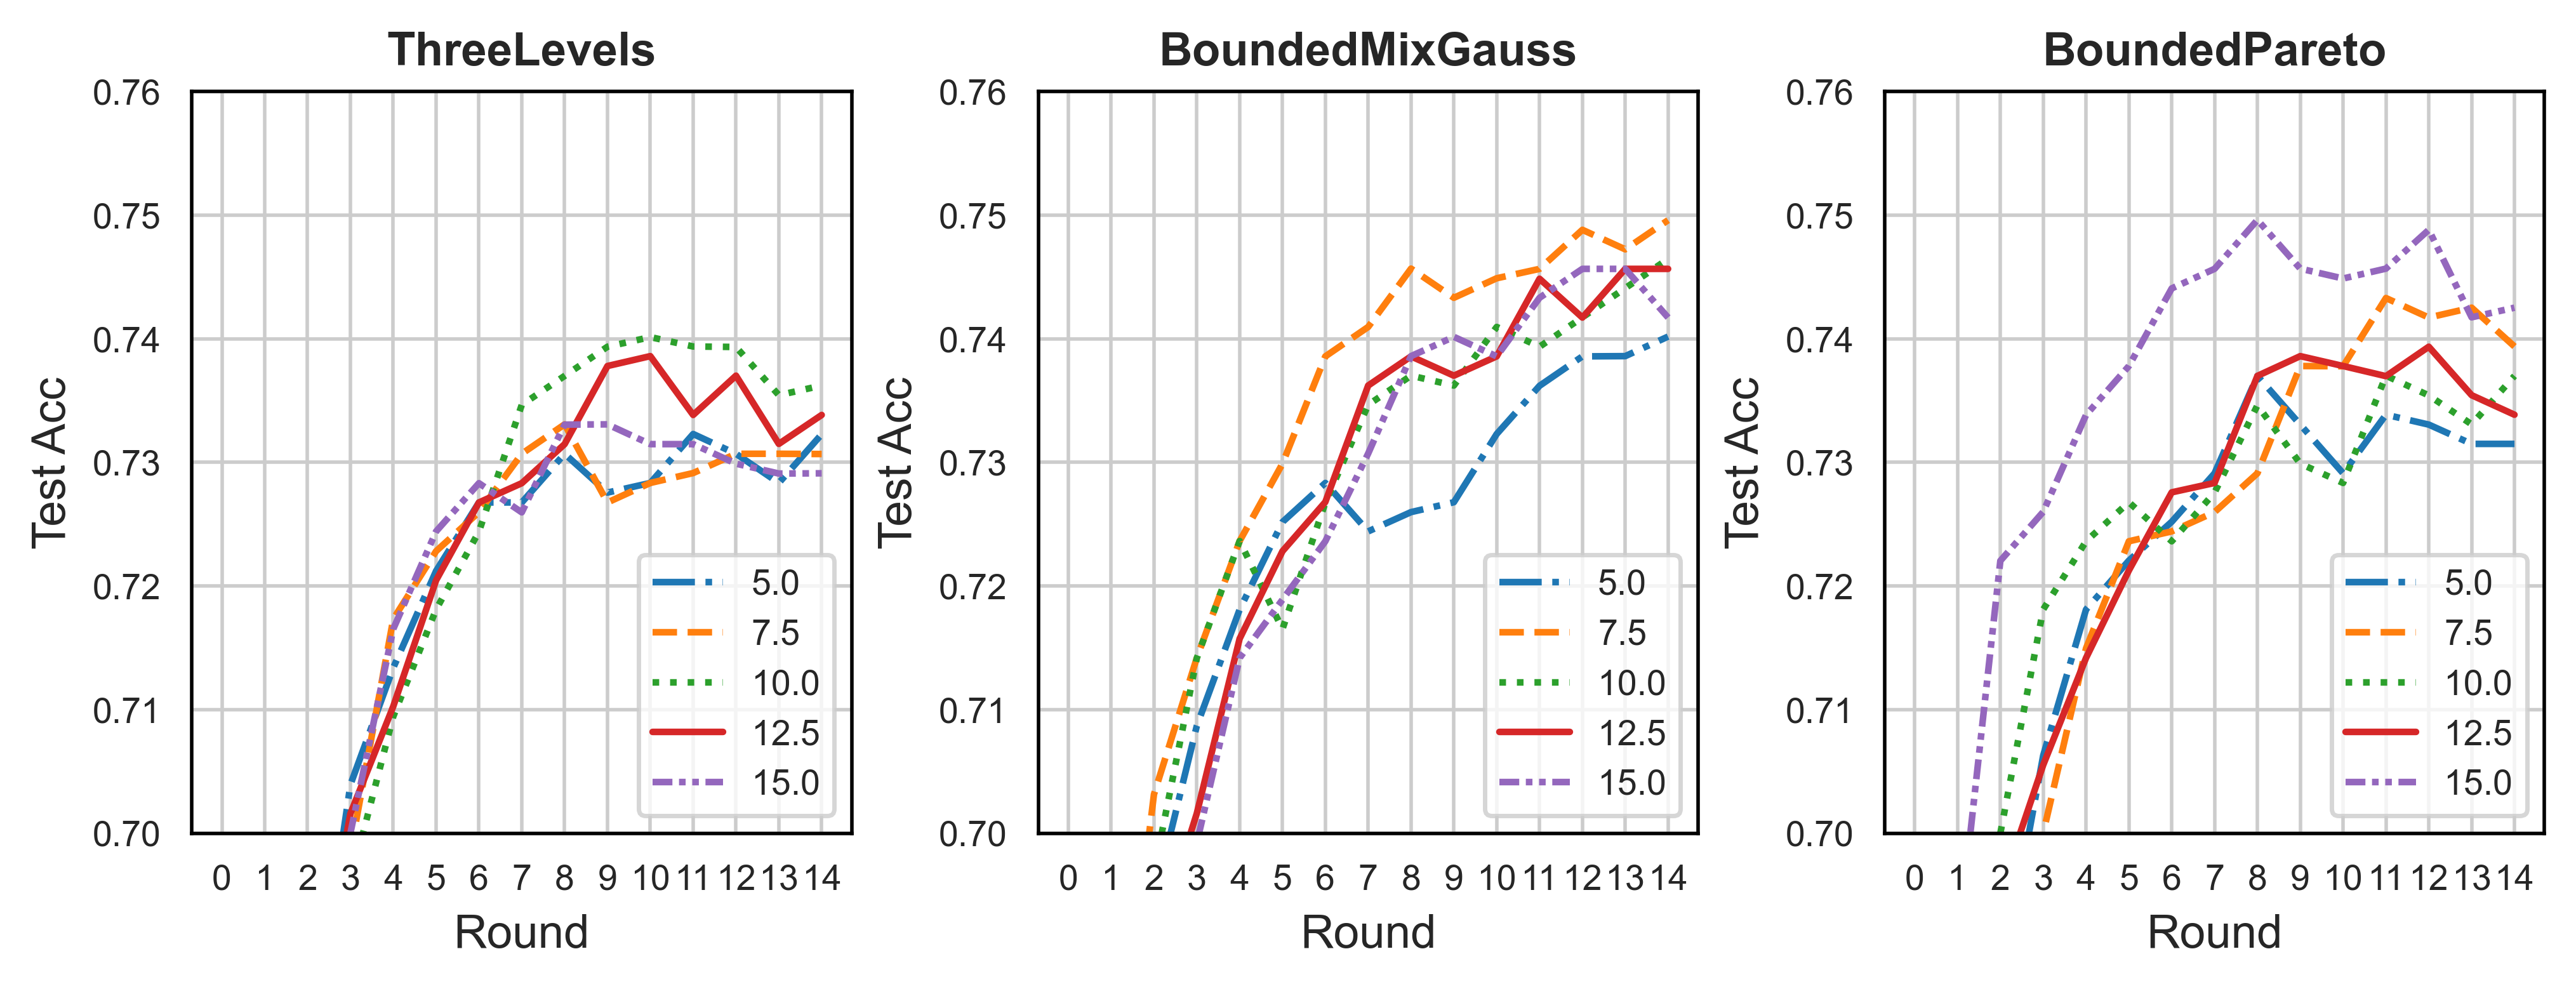

In [9]:
# Plot
import json
import os
import sys 
sys.path.append("../..")

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid', {'axes.linewidth': 1, 'axes.edgecolor':'black'}) #风格、轮廓线

import numpy as np
import pandas as pd
from itertools import product
from sklearn.metrics import r2_score
from fedrpdp.utils.rpdp_utils import MultiLevels, MixGauss, Pareto
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
from mpl_toolkits.axes_grid1.inset_locator import mark_inset

linestyle_str = [
    ("solid", "solid"),  # Same as (0, ()) or '-'
    ("dotted", "dotted"),  # Same as (0, (1, 1)) or ':'
    ("dashed", "dashed"),  # Same as '--'
    ("dashdot", "dashdot"),
]
linestyle_tuple = [
    ("loosely dotted", (0, (1, 10))),
    ("densely dotted", (0, (1, 1))),
    ("loosely dashed", (0, (5, 10))),
    ("densely dashed", (0, (5, 1))),
    ("loosely dashdotted", (0, (3, 10, 1, 10))),
    ("densely dashdotted", (0, (3, 1, 1, 1))),
    ("dashdotdotted", (0, (3, 5, 1, 5, 1, 5))),
    ("loosely dashdotdotted", (0, (3, 10, 1, 10, 1, 10))),
    ("densely dashdotdotted", (0, (3, 1, 1, 1, 1, 1))),
]
linestyles = linestyle_tuple + linestyle_str
legend_font = {'style': 'normal', 'size': 8, 'weight': "normal"}
label_font = {'family':'sans-serif', 'size': 10.5, 'weight': "normal"}
title_font = {'family':'sans-serif', 'size': 10.5, 'weight': "bold"}


n_repetitions = 5
results_dir = "./results/results_heart_disease_1225"
results = pd.read_csv(os.path.join(results_dir, "results_heart_disease_42.csv"))
for i in range(1, n_repetitions):
    result_ = pd.read_csv(os.path.join(results_dir, f"results_heart_disease_{42+i}.csv"))
    results = results.append(result_, ignore_index=True)

results = results.rename(columns={"mean_perf": "Performance"})
print(results)
results.to_csv(os.path.join(results_dir, "results_heart_disease.csv"), index=False)

GENERATE_EPSILONS = {
    "ThreeLevels": lambda n, params: MultiLevels(3, *params, n),
    "BoundedMixGauss": lambda n, params: MixGauss(*params, n),
    "BoundedPareto": lambda n, params: Pareto(*params, n), 
}
SETTINGS = {
    "ThreeLevels": [[[0.7,0.2,0.1], [0.1, 1.0, 5.0]]],
    "BoundedPareto": [[4, 0.1]], 
    "BoundedMixGauss": [[[0.7,0.2,0.1], [(0.1, 0.05), (1.0, 0.1), (5.0, 0.5)]]],
}
MIN_EPSILON, MAX_EPSILON = 0.1, 10.0
BoundedFunc = lambda values: np.array([min(max(x, MIN_EPSILON), MAX_EPSILON) for x in values])

enames = list(GENERATE_EPSILONS.keys())
deltas = [d for d in results["d"].unique() if not (np.isnan(d))]
nms = [nm for nm in results["nm"].unique() if not (np.isnan(nm))]

# vision
plt.close('all')
fig, axs = plt.subplots(1, 3, figsize=(8, 3), constrained_layout=True, dpi=500)

d = deltas[0]
for i, e in enumerate(enames):
    for j, nm in enumerate(nms):
        cdf = results.loc[results["e"].str.contains(e, na=False)].loc[results["e"].str.contains("Ours", na=False)].loc[results["d"] == d].loc[results["nm"] == nm]
        perf_str = np.array(cdf["perf"].tolist())
        data_arr = np.array([json.loads(_str) for _str in perf_str])
        data_mean = data_arr.mean(axis=0)
        data_std = data_arr.std(axis=0)
        sns.lineplot(data=data_mean, label=nm, linestyle=linestyles[::-1][j][1], ax=axs[i])

    axs[i].set_title(f'{e}', **title_font)
    axs[i].legend(loc='upper right', prop=legend_font)
    axs[i].set_ylabel('Test Acc', **label_font)
    axs[i].set_xlabel('Round', **label_font)
    axs[i].set_ylim(0.7, 0.76)
    axs[i].set_xticks(range(15))
    axs[i].tick_params(labelsize=8)
    axs[i].legend(loc='lower right', prop=legend_font)

plt.savefig(os.path.join(results_dir, "fed_3plots.pdf"), dpi=500, bbox_inches='tight')
plt.show()